<a href="https://colab.research.google.com/github/SofiaNikolaeva-adey-201/OPDA-practiki/blob/02.04-case-3/pract_02_04_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

Мы импортируем все библиотеки и сохраняем URL в переменной. Затем мы делаем HTTP запросить этот URL-адрес с помощью метода get для получения информации с этой веб-страницы.
Текстовый атрибут объекта запросов содержит данные HTML, которые передаются в функция pd.read_html. Эта функция возвращает список объектов DataFrame, содержащих различные таблицы на веб-странице. Поскольку на веб-странице есть только одна таблица, DataFrame (df) содержит только одну таблицу.

In [3]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0] # 0 тк это первая талица на странице, а их несколько


Изучаем  первые 5 записей: 

In [ ]:
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


Получение типов данных и пропущенных значений:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


Как мы видим, типы данных столбцов не в нужном нам формате. Gross столбец представляет собой числовой столбец. Однако этому столбцу был назначен тип данных объекта, поскольку он содержит как числовые, так и нечисловые
данные (символы типа “,”, “$”  и буквы типа «U» и «S»). Преобразуем данные:

# **Шаг 2. Обработка данных** 

На этом этапе мы:
  1. Удалим ненужные символы.
  2. Изменим типы данных.
  3. Удалим ненужные столбцы.
  4. Создадим новый столбец из существующего столбца.

Удалим ненужные строки из столбца **Gross**, оставив только
числовые значения:

In [ ]:
df['Gross']=df['Gross'].str.replace(r"US\$","").str.replace(r",","")

 Первая замена
метод удаляет «US$», а второй метод замены удаляет запятые. Замена
символ с пустой строкой ("") эквивалентен удалению символа. Теперь давайте используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [ ]:
df['Gross']=df['Gross'].astype('int64')

check:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     int64 
 4   Notes   50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
df['Gross'].head(5)

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
Name: Gross, dtype: int64

Нам также нужно извлечь месяц из даты, сначала изменив тип данных столбца «Дата» и затем применив к нему метод **DatetimeIndex**, как показано ниже:

In [ ]:
df['Date']=df['Date'].astype('datetime64')

In [ ]:
df['Month']=pd.DatetimeIndex(df['Date']).month

Наконец, мы удаляем два ненужных столбца из DataFrame, используя следующие
утверждение.

In [ ]:
df.drop(['#','Notes'],axis=1,inplace=True)

In [ ]:
df

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2
5,2018-02-11,Les Tuche 3,8753427,2
6,2018-02-18,Black Panther,7627163,2
7,2018-02-25,Black Panther,5637555,2
8,2018-03-04,La ch'tite famille,16739183,3
9,2018-03-11,La ch'tite famille,9546133,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    50 non-null     datetime64[ns]
 1   Film    50 non-null     object        
 2   Gross   50 non-null     int64         
 3   Month   50 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ KB


# **Шаг 3: Визуализация**

 сначала мы создаем еще один DataFrame (df1), который содержит подмножество
столбцов, которые содержат исходный DataFrame (df). Этот DataFrame, df1, содержит всего два столбцы - «Фильм» (название фильма) и «Gross» (Выручка). Затем мы сортируем значения выручки в порядке убывания. 

In [ ]:
df1=df[['Film','Gross']].sort_values(ascending=False,by='Gross')

В этот DataFrame добавляется нежелательный столбец («index»)

In [ ]:
#df1.drop(['index'],axis=1,inplace=True)

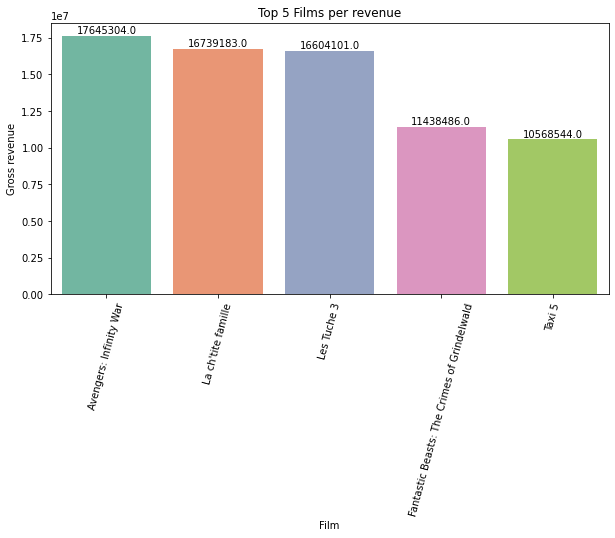

In [ ]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(10,5))
sns.set_palette("Set2")
#creating a bar plot
ax=sns.barplot(x='Film',y='Gross',data=df1.head(5))
#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
#setting the title
ax.set_title("Top 5 Films per revenue")
#setting the Y-axis labels
ax.set_ylabel("Gross revenue")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

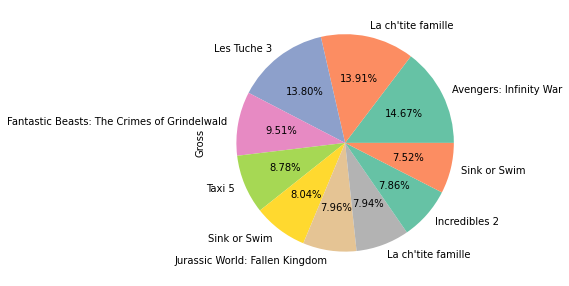

In [ ]:
df1['Gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Film'],
figsize=(10,5))
sns.set_palette("PiYG")

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

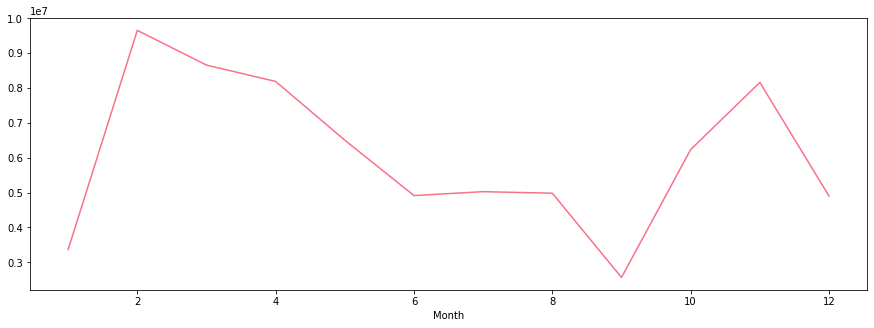

In [ ]:
#Aggregating the revenues by month
df2=df.groupby('Month')['Gross'].mean()
#creating a line plot
df2.plot(kind='line',figsize=(15,5))
sns.set_palette("husl")

# **Шаг 4: построение выводов на основе анализа и визуализаций**

1. Средний ежемесячный доход сильно колеблется, возможно
зависит от месяца выпуска фильмов, который может требуют дальнейшего анализа на протяжении многих лет.
  2. Три самых прибыльных фильма во Франции в 2018 году вышли Avengers, La Ch’tite Famille и Les Tuche 3.

Вопросы, на которые необходимо ответить с помощью анализа, включают:
  1. В каких странах самый низкий уровень смертности, максимум случаев и больше всего погибших?
  2. Какова месячная тенденция по количеству случаев и погибших с начала пандемии?
  3. В некоторых странах были введены ограничения, чтобы помочь сгладить кривую. Помогла ли эта мера снизить количество заболевших?

**Шаг 1.** Импорт данных и изучение характеристик набора данных

In [ ]:
from google.colab import files
uploaded = files.upload()

Прочтите набор данных и изучите первые пять строк (используя метод head) с помощью файла ***pd.read_excel***:

In [ ]:
#Ваш код

Получите информацию о типе данных каждого столбца и количестве ненулевых значений в каждом столбце (используя метод **info**).

In [ ]:
#Ваш код

Получите сводную статистику для каждого столбца (используя метод описания) и получите значения **count, min, max, стандартное отклонение и процентиль**:

# **Вариант 1.**

**Вариант 1.** неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах России.
Highest-grossing Russian films
 (https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films)


In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/Cinema_of_Russia#List_of_highest-grossing_films'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1] # 0 тк это первая талица на странице, а их несколько

In [ ]:
df.head()

,Rank,Title,Gross,Year,Genre,Details,Director
0,1,Сталинград Stalingrad,"$68,075,573",2013,War,A World War II film about Battle of Stalingrad,Fyodor Bondarchuk
1,2,Движение Вверх Going Vertical,"$66,000,000",2017,Sports drama,About 1972 Olympic Men's Basketball Final,Anton Megerdichev
2,3,Ирония судьбы. Продолжение Irony of Fate: The ...,"$55,639,114",2007,Romantic comedy,"A Christmas film, the sequel to a 1976 film of...",Timur Bekmambetov
3,4,Холоп Serf,"$47,500,000",2019,Comedy,NaN,Klim Shipenko
4,5,Дневной дозор Day Watch,"$42,918,532",2006,Fantasy,Based on urban fantasy book series Dozory by S...,Timur Bekmambetov


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     object
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


In [ ]:
df['Gross']=df['Gross'].str.replace(r"$","").str.replace(r",","")

In [ ]:
df.head()

,Rank,Title,Gross,Year,Genre,Details,Director
0,1,Сталинград Stalingrad,68075573,2013,War,A World War II film about Battle of Stalingrad,Fyodor Bondarchuk
1,2,Движение Вверх Going Vertical,66000000,2017,Sports drama,About 1972 Olympic Men's Basketball Final,Anton Megerdichev
2,3,Ирония судьбы. Продолжение Irony of Fate: The ...,55639114,2007,Romantic comedy,"A Christmas film, the sequel to a 1976 film of...",Timur Bekmambetov
3,4,Холоп Serf,47500000,2019,Comedy,NaN,Klim Shipenko
4,5,Дневной дозор Day Watch,42918532,2006,Fantasy,Based on urban fantasy book series Dozory by S...,Timur Bekmambetov


In [ ]:
df['Gross']=df['Gross'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      30 non-null     int64 
 1   Title     30 non-null     object
 2   Gross     30 non-null     int64 
 3   Year      30 non-null     int64 
 4   Genre     30 non-null     object
 5   Details   26 non-null     object
 6   Director  30 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.8+ KB


In [ ]:
df['Gross'].head(5)

0    68075573
1    66000000
2    55639114
3    47500000
4    42918532
Name: Gross, dtype: int64

In [ ]:
df['Year']=df['Year'].astype('int64')

In [ ]:
df['Year']

0     2013
1     2017
2     2007
3     2019
4     2006
5     2014
6     2008
7     2013
8     2004
9     2012
10    2008
11    2013
12    2009
13    2011
14    2011
15    2016
16    2005
17    2017
18    2011
19    2016
20    2010
21    2010
22    2009
23    2006
24    2013
25    2015
26    2010
27    2005
28    2017
29    2011
Name: Year, dtype: int64

In [ ]:
df.drop(['Rank', 'Director', 'Details'],axis=1,inplace=True)

In [ ]:
df

,Title,Gross,Year,Genre
0,Сталинград Stalingrad,68075573,2013,War
1,Движение Вверх Going Vertical,66000000,2017,Sports drama
2,Ирония судьбы. Продолжение Irony of Fate: The ...,55639114,2007,Romantic comedy
3,Холоп Serf,47500000,2019,Comedy
4,Дневной дозор Day Watch,42918532,2006,Fantasy
5,Вий Viy,39539416,2014,"Fantasy, Horror"
6,Адмиралъ Admiral,38135878,2008,"Biography, History"
7,Ёлки 3 Yolki 3,38067427,2013,Comedy
8,Ночной дозор Night Watch,33951015,2004,Fantasy
9,Три богатыря на дальних берегах Three Knights ...,31505876,2012,"Animation, Fantasy"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   30 non-null     object
 1   Gross   30 non-null     int64 
 2   Year    30 non-null     int64 
 3   Genre   30 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [ ]:
df1=df[['Title','Gross']].sort_values(ascending=False,by='Gross')

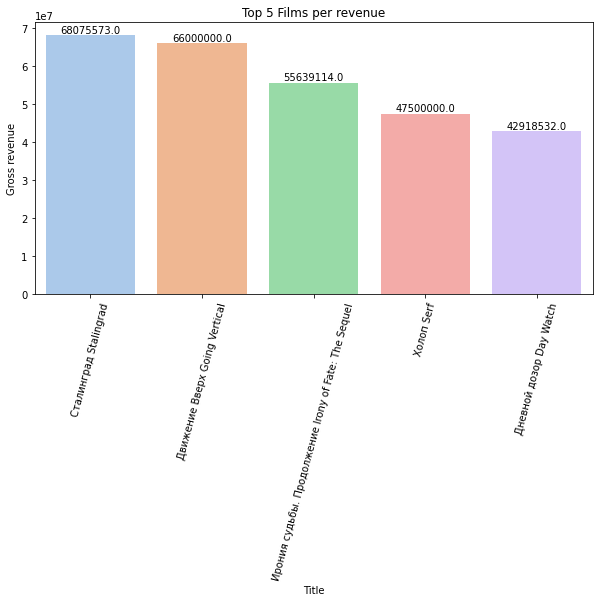

In [ ]:
#Plotting the top 5 films by revenue
#setting the figure size
plt.figure(figsize=(10,5))
#creating a bar plot
ax=sns.barplot(x='Title',y='Gross',data=df1.head(5))
#rotating the x axis labels
ax.set_xticklabels(labels=df1.head()['Title'],rotation=75)
#setting the title
ax.set_title("Top 5 Films per revenue")
#setting the Y-axis labels
ax.set_ylabel("Gross revenue")
#Labelling the bars in the bar graph
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

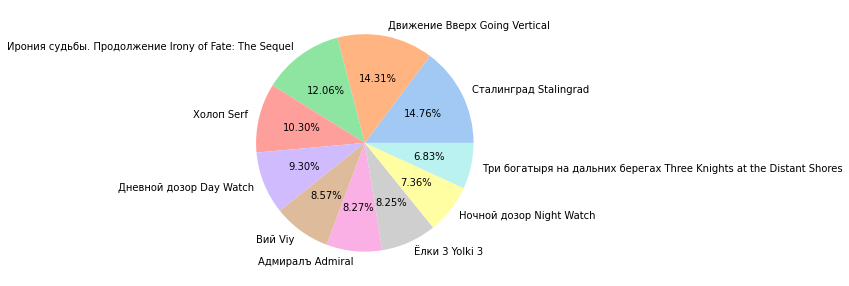

In [ ]:
df1['Gross'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Title'],
figsize=(10,5), ylabel = '')
sns.set_palette("pastel")

In [ ]:
df4=df[['Year','Gross', 'Title']].sort_values(by='Year').head(8)
df4

,Year,Gross,Title
8,2004,33951015,Ночной дозор Night Watch
27,2005,18500000,Турецкий гамбит The Turkish Gambit
16,2005,25555809,9 рота The 9th Company
4,2006,42918532,Дневной дозор Day Watch
23,2006,21015154,Волкодав Wolfhound
2,2007,55639114,Ирония судьбы. Продолжение Irony of Fate: The ...
6,2008,38135878,Адмиралъ Admiral
10,2008,30496695,Самый лучший фильм The Best Movie


Text(0, 0.5, 'Gross')

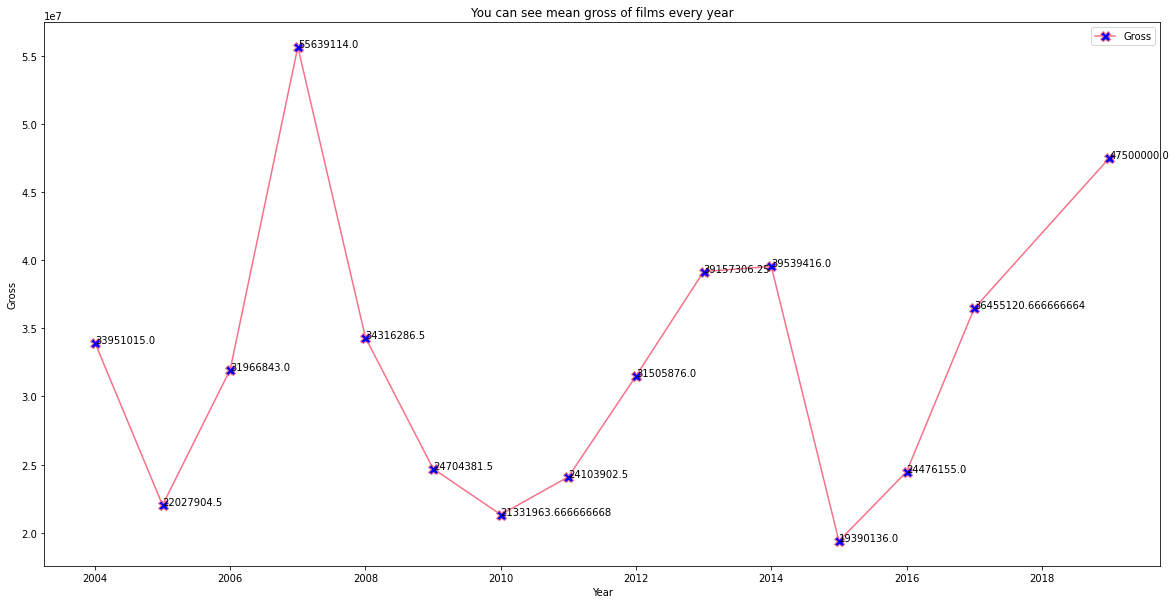

In [ ]:
df4=df.groupby('Year')['Gross'].mean()
df5 = pd.DataFrame(df4)
#creating a line plot
df5.plot(kind='line',figsize=(20,10), marker = 'X', markersize = 10, markerfacecolor='blue')
sns.set_palette("husl")
for a,b in zip(df5.index, df5['Gross']): 
    plt.text(a, b, str(b))
plt.title('You can see mean gross of films every year')
plt.ylabel('Gross')


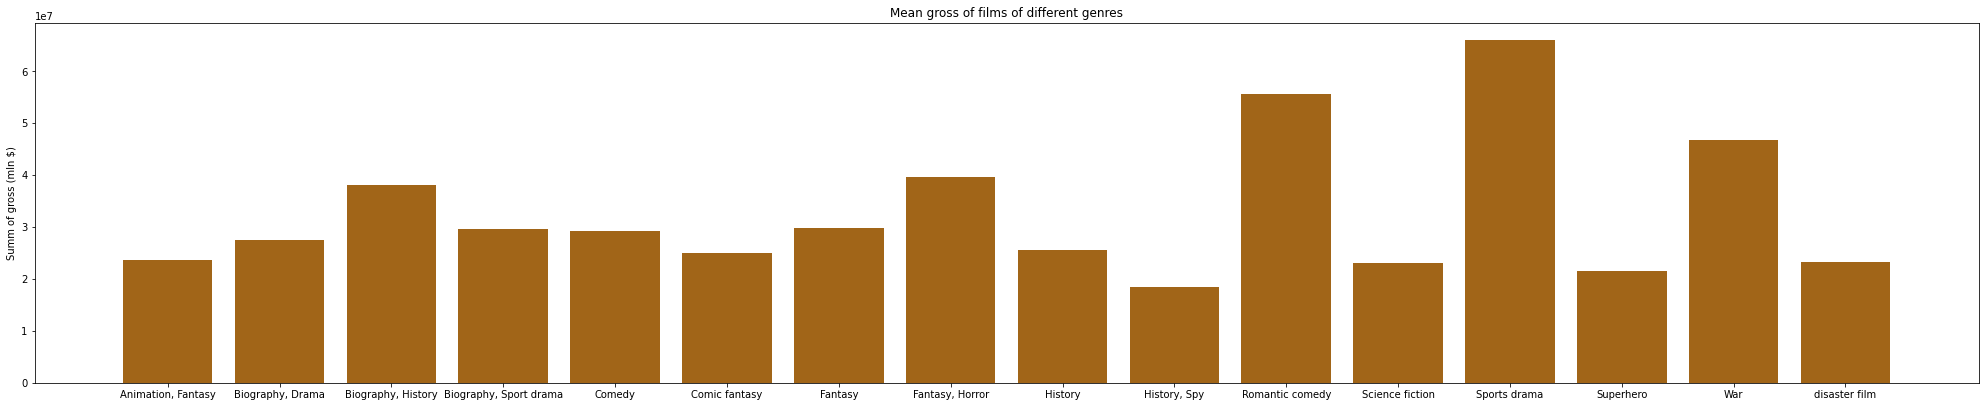

In [ ]:
df2=df.groupby('Genre')['Gross'].mean()
df3 = pd.DataFrame(df2)
fig = plt.figure(figsize=(27,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(df3.index, df3['Gross'])
ax.set_title("Mean gross of films of different genres")
ax.set_ylabel('Summ of gross (mln $)')
plt.show()

Text(0.5, 1.0, 'Heatmap: years and gross')

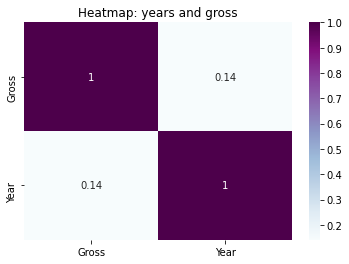

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'BuPu')
plt.title('Heatmap: years and gross')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Numbers of films in each year')

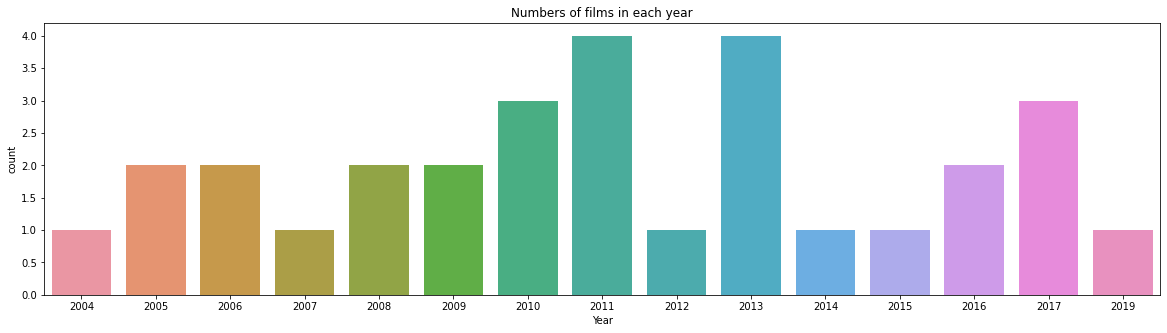

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df['Year'])
plt.title('Numbers of films in each year')

Text(0.5, 1.0, 'You can see summs of gross for each year')

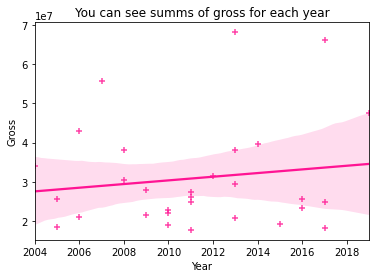

In [ ]:
sns.regplot(x = 'Year', y = 'Gross', data = df, color="deeppink", marker="+")
plt.title('You can see summs of gross for each year')

# **Построение выводов на основе графиков**

1) Года, в которых были выпущены самые прибыльные фильмы: 2011, 2013, 2010

2) Самые прибыльные жанры: спортивная драмма, романтическая комедия и военный

3) Самый прибыльный фильм - "Сталинград"



# **Case study 2: Use of data analysis for air quality management**

Для мониторинга состояния качества атмосферного воздуха Центральный совет по контролю за загрязнением (ЦCКЗ) Индии управляет обширной сетью станций мониторинга, разбросанных по всей стране. Регулярно контролируемые параметры включают диоксид серы (SO2), оксиды азота в виде диоксида азота (NO2), озон и мелкие твердые частицы (PM2,5). Основываясь на тенденциях на протяжении многих лет, качество воздуха в столице страны Дели стало предметом озабоченности общественности.
Далее следует пошаговый анализ ежедневных данных о качестве воздуха, чтобы продемонстрировать, как анализ данных может помочь в планировании мероприятий в рамках управления качеством воздуха.
**Примечание.** Набор данных, использованный для этого тематического исследования, называется **«NSIT Dwarka.csv»**. Пожалуйста, обратитесь к разделу технического описания для получения подробной информации о том, как импортировать этот набор данных.

Вопросы, на которые мы хотим ответить с помощью нашего анализа:
 1. Среднегодовые значения: из четырех загрязнителей - SO2, NO2, озона и PM2,5 - среднегодовые уровни которых регулярно превышают установленные годовые нормы?
 2. Суточные нормы. В отношении загрязнителей, какое количество дней в году дневные нормы превышаются?
 3. Временные колебания. В какие месяцы уровни загрязнения превышают критические уровни в большинстве дней?

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSIT Dwarka.csv to NSIT Dwarka.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#aqdata is the name of the DataFrame, short for Air Quality Data.
aqdata=pd.read_csv('NSIT Dwarka.csv')
aqdata.head()

Проверка типов данных столбцов:

In [ ]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      2191 non-null   object
 3   SO2        2187 non-null   object
 4   Ozone      2187 non-null   object
 5   NO2        2190 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Наблюдение: хотя значения SO2, NO2, озона и PM2,5 являются числовыми, Pandasсчитывает тип данных этих столбцов как «объект». Для работы с этими столбцами (т. Е. Построить график графики, наблюдать за тенденциями, рассчитывать агрегированные значения), нам нужно изменить типы данных
эти столбцы. Кроме того, похоже, есть некоторые недостающие записи.

# **Шаг 2. Обработка данных**

Основываясь на наблюдениях на предыдущем шаге, на этом шаге мы будем
  1. Работать с пропущенными значениями. У нас есть возможность отказаться от нулевые значения или замена нулевых значений.
  2. Изменение типа данных для столбцов.

Проверим наличие отсутствующих значений в наборе данных:

In [ ]:
#Ваш код

Кажется, что пропущенных значений не так много, но в этом и заключается загвоздка. Когда мы проверив первые несколько строк с помощью оператора head, мы увидели, что некоторые пропущенные значения представлены как **None **в исходном наборе данных. Однако они не признаются как нулевые значения от Pandas. Заменим значение **None** значением **np.nan**, чтобы **Pandas** признает эти значения как нулевые значения:

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Мы видим, что столбцы, содержащие числовые значения, не распознаются как числовые столбцы, а столбцы, содержащие даты, также не распознаются правильно. Имея столбцы с неправильными типами данных становятся препятствием для следующего шага, на котором мы анализировать тенденции и строить графики; этот шаг требует, чтобы типы данных столбцов были в
формате, подходящем для чтения. В следующих строках кода мы используем метод ***pd.to_datetime*** для преобразования типа данных.
столбцов «From Date» и «To Date» к типу datetime, что упрощает
анализируйте отдельные компоненты даты, такие как месяцы и годы.

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Поскольку большая часть нашего анализа рассматривает годовые данные, мы создаем новый столбец для извлечения
года, используя функцию **pd.DatetimeIndex**.

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Теперь давайте посмотрим на количество нулевых значений в данных за каждый год:

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Из анализа нулевых значений для каждого года мы видим, что данные за 2014 и
2015 имеют большинство недостающих значений. Следовательно, мы предпочитаем игнорировать данные из
2014 и 2015 годы, и проанализировать данные за 4 года с 2016 по 2019 год. В соответствии с нормами установлено Центральным советом по контролю за загрязнением, Индия, нам необходимо ежедневно контролировать не менее 104
значения для получения среднегодовых значений.
2016, 2017, 2018 и 2019 - это четыре года, за которые будут собираться данные о качестве воздуха. Прежде чем перейти к следующему шагу, мы отбрасываем недостающие значения для каждого года. с 2016 по 2019 год вместо их замены, поскольку у нас достаточно данных (более104 показаний) для каждого из этих четырех лет, чтобы рассчитать среднегодовые значения, как показано ниже.

In [ ]:
#Ваш код

# **Шаг 3: Визуализация**

In [ ]:
Часть 1 анализа: построение среднегодовых значений загрязняющих веществ.
На основе данных мониторинга средних 24-часовых концентраций в атмосферном воздухе PM2,5, SO2,
NO2 и озон (O3), среднегодовые значения наносятся на график для определения параметров, для которых
установленные национальные стандарты качества атмосферного воздуха для среднегодовых превышений.
Сначала мы рассчитываем среднегодовые значения для каждого загрязнителя (PM2,5, SO2, NO2 и озон), как
следует:

In [ ]:
#Ваш код

Пояснение: Обозначения для именования переменных, представляющих средние значения загрязняющих веществ. выглядит следующим образом: первая буква загрязнителя, год и сокращение «avg» для в среднем. Например, s15avg обозначает средний уровень SO2 в 2015 году. Мы используем метод вычисления среднего и функция округления для округления среднего значение до двух десятичных знаков. Мы не рассматриваем озон, поскольку годовые стандарты не учитываются. применимо к озону. Затем мы создаем DataFrame для каждого загрязнителя с двумя столбцами в каждом. Один из столбцы представляют год, а другой столбец показывает средний годовой уровень для этот год.

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Наблюдение: очевидно, что среднегодовые нормы превышаются только для PM2,5.
Для NO2 наблюдаемые значения относительно близки к предписанному стандарту. Для SO2 наблюдаемые значения намного меньше годовой нормы. Поэтому для дальнейшего анализа учитываются только эти два загрязнителя (NO2 и PM2,5)

**Часть 2 анализа качества воздуха: график количества дней в году, когда 24 часа в сутки превышены нормы для PM2,5 и NO2**

В то время как на этапе 1 анализа указываются загрязнители, вызывающие озабоченность с точки зрения управления качеством воздуха. и планирование вмешательств, на шаге 2, на каждый год, мы показываем, как различные уровни
превышение нормативов для суточных значений распределяется. В случае PM2,5 мы
нанесите на график количество дней в году, для которых наблюдаемые значения попадают в следующие диапазоны.
  а. От 0 до 60 мкг / м3
  б. От 61 до 120 мкг / м3
  c. От 121 до 180 мкг / м3
  d. > 180 мкг / м3
Чтобы построить эти данные, нам нужно создать объекты DataFrame для каждого года с 2016 по 2019 год. фиксирование количества дней, в течение которых уровни PM2,5 падали в каждом из этих интервалов, как показано В следующих:

Вывод: наблюдаемые суточные значения NO2 превышаются только в течение трех из пяти лет.
Поскольку наблюдаемые суточные значения NO2 превышают стандартные лишь незначительно и только в течение нескольких дней, следующий шаг ограничен дальнейшим анализом PM2,5.
Часть 3 анализа качества воздуха: Определение месяцев, в которые суточные значения PM2,5 превышают критические уровни в большинстве дней Перед введением ограничений на такие виды деятельности, как движение транспортных средств и строительство, которые вносят значительный вклад в концентрации PM2,5 в окружающей среде, необходимо: предоставлять
достаточное уведомление, чтобы избежать неудобств для широкой публики. Следовательно, для суточных значений PM2,5, значительно превышающих 180 мкг / м3, мы наносим график изменения во времени по годам в течение каждого месяца в году. Для этого для каждого из двенадцати месяцев мы фиксируем количество дней с критическим загрязнением воздуха каждый год с суточными значениями PM2,5, превышающими 180 мкг / м3.
Сначала мы создаем кадры данных для каждого года с количеством дней в каждом месяце, когда значения PM2,5 превышают 180 мкг / м3, как показано ниже.

Из предыдущего графика видно, что большинство критически загрязненных дней приходится на Январь, ноябрь и декабрь. Следовательно, исходя из среднесуточных концентраций PM2,5 зафиксировано за последние четыре года, ограничения движения автотранспорта, строительство деятельность, использование дизельных насосных агрегатов, отклонение движения транспорта, прибывающего в Дели из соседних штатов, и другие аналогичные действия, вероятно, будут введены в январе, ноябре и Декабрь. Чтобы принять такие решения для Дели в целом, анализ данных из других
также потребуются станции мониторинга. Распространение данных и анализ
предыдущие строки помогут людям заранее подготовиться к ограничениям, а также
оцените обоснование таких мер.
Подход, продемонстрированный ранее, с использованием анализа данных в качестве инструмента, помогающего в управление качеством воздуха, использует данные, записанные на одной станции мониторинга, расположенной в
Технологический институт Нетаджи Субхаса (NSIT), Дели. Методология могла быть осуществлена вперед по следующим строкам.
 а. Повторите предыдущий шаг для NO2, чтобы показать критические месяцы, в которые приходится на большую часть дней с зарегистрированными значениями NO2, превышающими 24-часовые стандарты. Выполнение этого упражнения снова поможет определить месяцев, когда уровни загрязнения вызывают озабоченность по обоим параметрам, PM2.5 и NO2, и план.
 б. Повторите анализ, проведенный с данными о качестве воздуха.станции мониторинга НСИТ с использованием аналогичных данных из другие станции, чтобы интервенции для Дели в целом могли быть планируется.

# **Case study 3: Worldwide COVID-19 cases – an analysis**

Вопросы, на которые необходимо ответить с помощью анализа, включают:
  1. В каких странах самый низкий уровень смертности, максимум случаев и больше всего погибших?
  2. Какова месячная тенденция по количеству случаев и погибших с начала пандемии?
  3. В некоторых странах были введены ограничения, чтобы помочь сгладить кривую. Помогла ли эта мера снизить количество заболевших?

**Шаг 1.** Импорт данных и изучение характеристик набора данных

In [5]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx to COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx


Прочтите набор данных и изучите первые пять строк (используя метод head) с помощью файла ***pd.read_excel***:

In [6]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


Получите информацию о типе данных каждого столбца и количестве ненулевых значений в каждом столбце (используя метод **info**).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


Получите сводную статистику для каждого столбца (используя метод описания) и получите значения **count, min, max, стандартное отклонение и процентиль**:

In [8]:
df.describe()

,day,month,year,cases,deaths,popData2019
count,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
std,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


# **Шаг 2. Обработка данных**

На этом этапе выполним:
• Проверку: правильно ли определены типы данных столбцов. Если нет, изменить типы данных: из вывода информационного метода мы видим, что все типы данных столбцов были правильно идентифицированы.
• При необходимости переименовать столбцы: в следующем коде переименовываем столбцы DataFrame.

In [9]:
df.columns = ['date', 'day', 'month', 'year', 'cases', 'deaths', 'country', 'old_country_code', 'country_code', 'population', 'continent']

Отбросьте ненужные столбцы или строки:
• Мы видим, что столбец кода страны присутствует дважды (с двумя разными именами: **'old_country_code'** и **'country_code'**) в DataFrame, поэтому мы удаляем один из столбцов («**old_country_code**»):

In [10]:
df.drop(['old_country_code'],axis=1,inplace = True)

Удалить все лишние данные, которые не добавляют никакой ценности:
В этом DataFrame нет пробелов, специальных символов или любых других посторонних символов. Мы видим, что есть данные только за один день декабря 2019 года; поэтому мы удаляем данные за этот месяц и создаем новый DataFrame (df1) на оставшиеся 11 месяцев.

In [11]:
df1 = df[df.month!=12]

Проверьте, есть ли какие-либо нулевые значения, используя метод **isna** или **isnull**, и примените соответствующие методы для работы с ними, если они есть:
Расчет процента нулевых значений:

In [12]:
df1.isna().sum().sum()/len(df1)

0.0047556142668428005

Поскольку процент нулевых значений меньше **1%**, мы отбрасываем нулевые значения на следующем шаге.

In [13]:
df1.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.isna().sum().sum()/len(df1)

0.0

In [15]:
df1

,date,day,month,year,cases,deaths,country,country_code,population,continent
0,2020-06-29,29,6,2020,351,18,Afghanistan,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


**Агрегируем данные**,

если данные находятся в этом формате формате: данные в этом DataFrame не в агрегированном формате, и мы преобразуем их в этот формат с помощью метода **groupby** на этом этапе. Мы можем группировать по странам, континентам или по дате. Сгруппируем по названию страны.

In [16]:
df_by_country = df1.groupby('country')['cases', 'deaths'].sum()
df_by_country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


Предыдущие выходные данные показывают консолидированную картину количества случаев заболевания и смертей по каждой стране.

Давайте добавим еще один столбец в этот агрегированный DataFrame - коэффициент смертности, который представляет собой отношение количества смертей к количеству случаев.

In [17]:
df_by_country['mortality_rate'] = df_by_country['deaths']/df_by_country['cases']
df_by_country

,cases,deaths,mortality_rate
country,,,
Afghanistan,30967,721,0.023283
Albania,2402,55,0.022898
Algeria,13273,897,0.067581
Andorra,855,52,0.060819
Angola,267,11,0.041199
...,...,...,...
Vietnam,355,0,0.000000
Western_Sahara,208,1,0.004808
Yemen,1118,302,0.270125


# **Шаг 3: Визуализация данных**

В  первой визуализации этого исследования используем агрегированные данные в DataFrame, «**df_by_country**», для отображения двадцати стран с наибольшим уровнем смертности. 

Text(0.5, 1.0, 'Countries with highest mortality rates')

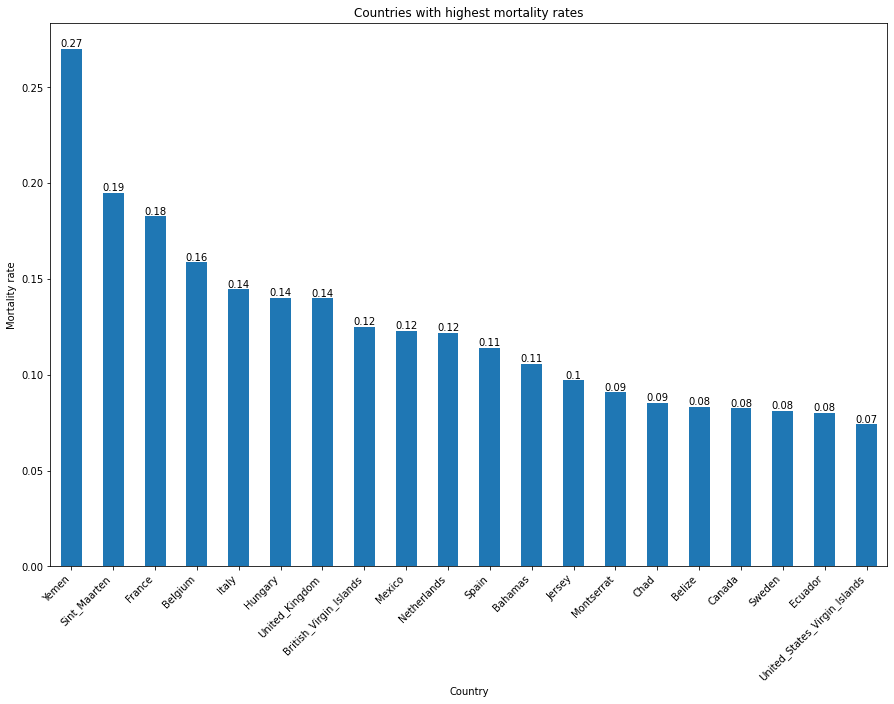

In [18]:
plt.figure(figsize = (15,10))
ax = df_by_country['mortality_rate'].sort_values(ascending = False).head(20).plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
for p in ax.patches:
  ax.annotate(p.get_height().round(2), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')
ax.set_xlabel('Country')
ax.set_ylabel('Mortality rate')
ax.set_title('Countries with highest mortality rates')

Во второй визуализации мы отображаем десять стран с наибольшим количеством случаев COVID-19, используя круговую диаграмму, как показано на рисунке ниже.

Text(0.5, 1.0, 'Top ten countries by case load')

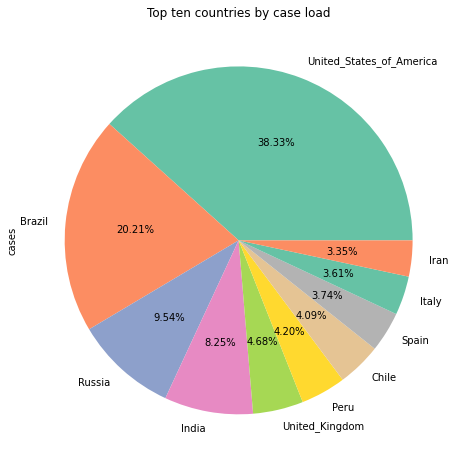

In [19]:
df_cases = df_by_country['cases'].sort_values(ascending = False)
sns.set_palette("Set2")
ax = df_cases.head(10).plot(kind = 'pie', autopct = '%.2f%%', labels = df_cases.index, figsize = (12,8))
ax.set_title('Top ten countries by case load')

В следующей визуализации с помощью гистограммы выясняем пять стран, которые больше всего пострадали с точки зрения человеческих потерь в результате пандемии COVID-19.

Text(0, 0.5, 'Number of deaths')

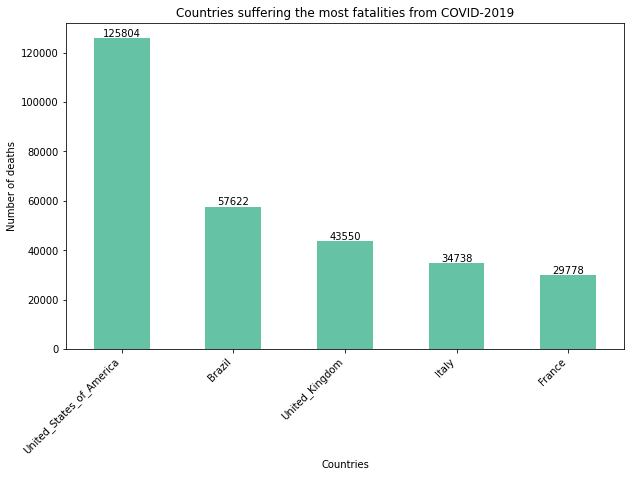

In [20]:
plt.figure(figsize = (10,6))
ax = df_by_country['deaths'].sort_values(ascending = False).head(5).plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')
  ax.set_title('Countries suffering the most fatalities from COVID-2019')
ax.set_xlabel('Countries')
ax.set_ylabel('Number of deaths')

Теперь  построим линейные графики, чтобы увидеть ежемесячный тренд числа случаев COVID-19 и смертельных исходов.
Чтобы построить линейные графики, мы сначала агрегируем данные по месяцам, а затем строим два линейных графика рядом, показывая количество случаев заболевания и смертей, как показано на рисунке ниже.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of deaths')

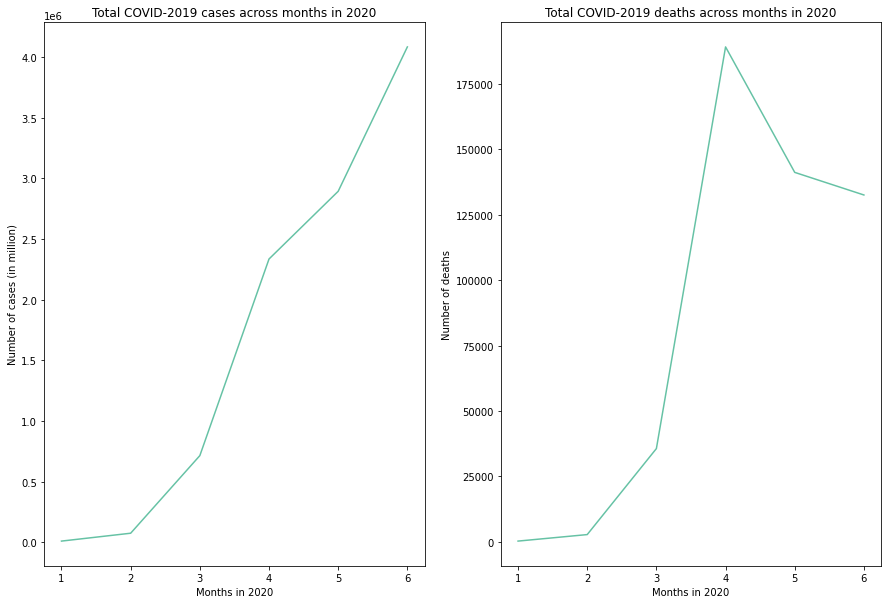

In [23]:
df_by_month = df1.groupby('month')['cases', 'deaths'].sum()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
df_by_month['cases'].plot(kind = 'line', ax=ax1)
ax1.set_title('Total COVID-2019 cases across months in 2020')
ax1.set_xlabel('Months in 2020')
ax1.set_ylabel('Number of cases (in million)')
df_by_month['deaths'].plot(kind = 'line', ax = ax2)
ax2.set_title('Total COVID-2019 deaths across months in 2020')
ax2.set_xlabel('Months in 2020')
ax2.set_ylabel('Number of deaths')

Многие страны ввели локдаун, чтобы остановить волну увеличения числа случаев заболевания. Теперь мы посмотрим на четыре страны - Индию, Великобританию, Италию и Германию - где в марте были введены ограничения, чтобы увидеть, оказала ли эта мера желаемый эффект.
Сначала мы создаем объекты DataFrame для каждой из этих стран с агрегированными данными по месяцам.

In [24]:
df_germany = df1[df1.country == 'Germany']
df_germany_monthwise = df_germany.groupby('month')['cases', 'deaths'].sum()
df_germany_grouped = df_germany_monthwise.reset_index()

df_uk = df1[df1.country == 'United_Kingdom']
df_uk_monthwise = df_uk.groupby('month')['cases', 'deaths'].sum()
df_uk_grouped = df_uk_monthwise.reset_index()

df_india = df1[df1.country == 'India']
df_india_monthwise = df_india.groupby('month')['cases', 'deaths'].sum()
df_india_grouped = df_india_monthwise.reset_index()

df_italy = df1[df1.country == 'Italy']
df_italy_monthwise = df_italy.groupby('month')['cases', 'deaths'].sum()
df_italy_grouped = df_italy_monthwise.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  



Теперь  используем объекты DataFrame, созданные на предыдущих шагах, для построения линейных графиков для этих стран, чтобы увидеть количество случаев в разные месяцы в 2020 году, как показано на рисунке ниже. 

In [ ]:
#Ваш код

# **Шаг 4:** Построение выводов на основе анализа и визуализаций

Количество случаев: наибольшее количество случаев зарегистрировано в США, Бразилии, России, Индии и Великобритании.
• Количество смертей: США, Бразилия, Великобритания, Италия и Франция имели самые высокие показатели смертности. Уровень смертности: Йемен, Сен-Мартен, Франция, Бельгия и Италия имели самые высокие показатели смертности.
• Тенденции:
• Общее количество заболевших неуклонно растет, в то время как общее количество смертей (смертей) снизилось после Апреля.
• Влияние локдауна: мы проанализировали четыре страны - Индию, Великобританию, Германию и Италию - где в марте были введенлокдаун. За исключением Индии, во всех этих странах наблюдалось общее снижение числа случаев после введения карантина. В Великобритании и Германии число случаев заболевания сначала увеличилось (на ранней стадии закрытия стран), но после этого всплеска стало снижаться.

# **Задание 1**

Рассмотрим первую таблицу на следующей веб-странице: https://en.wikipedia.org/wiki/Climate_of_South_Africa. Она содержит данные о максимальных и минимальных температурах (в градусах Цельсия) в различных городах Южной Африки летом и зимой.

1.   Используйте соответствующий метод из модуля запросов, чтобы отправить запрос на получение по этому URL-адресу и сохранить данные из первой таблицы на этой странице в фрейме данных Pandas.

2.   Переименуйте столбцы следующим образом:  **'City', 'Summer(max)', 
'Summer(min)', 'Winter(max)', 'Winter(min)'** .

3.   Замените отрицательное значение в первой строке столбца ‘Winter(min)’ на 0 и преобразуйте тип данных этого столбца в int64.

4.   Постройте график для отображения самых жарких городов в Южной Африке летом (используйте столбец Summer(max)).

5.   Постройте график для отображения самых холодных городов в Южной Африке зимой (используйте столбец Winter(min)).



In [30]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url=' https://en.wikipedia.org/wiki/Climate_of_South_Africa'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [31]:
df

City Summer(January)     Winter(July)    
                City             Max Min          Max Min
0       Bloemfontein              29  15           15  –2
1          Cape Town              26  16           16   7
2             Durban              28  21           23  11
3        East London              26  18           19  10
4             George              25  15           15   7
5       Johannesburg              26  15           17   4
6          Kimberley              33  18           19   3
7            Mthatha              27  16           21   4
8             Musina              34  21           25   7
9          Nelspruit              29  19           23   6
10  Pietermaritzburg              28  18           23   3
11         Polokwane              28  17           20   4
12    Port Elizabeth              25  18           20   9
13          Pretoria              29  18           18   5
14      Richards Bay              29  21           23  12
15           Skukuza              33  21           26   6
16       Thohoyandou              31  20           24  10
17          Upington              36  20           21   4

In [32]:
df.columns = [ 'City', 'Summer(max)', 'Summer(min)', 'Winter(max)', 'Winter(min)']
df

,City,Summer(max),Summer(min),Winter(max),Winter(min)
0,Bloemfontein,29,15,15,–2
1,Cape Town,26,16,16,7
2,Durban,28,21,23,11
3,East London,26,18,19,10
4,George,25,15,15,7
5,Johannesburg,26,15,17,4
6,Kimberley,33,18,19,3
7,Mthatha,27,16,21,4
8,Musina,34,21,25,7
9,Nelspruit,29,19,23,6


In [36]:
df.iloc[0, df.columns.get_loc('Winter(min)')] = 0
df['Winter(min)']=df['Winter(min)'].astype('int64')

In [40]:
df1=df[['City', 'Summer(max)']].sort_values(ascending=False,by='Summer(max)')
df1.set_index('City', inplace=True)
df1

,Summer(max)
City,
Upington,36
Musina,34
Skukuza,33
Kimberley,33
Thohoyandou,31
Richards Bay,29
Pretoria,29
Bloemfontein,29
Nelspruit,29


<Figure size 1080x720 with 0 Axes>

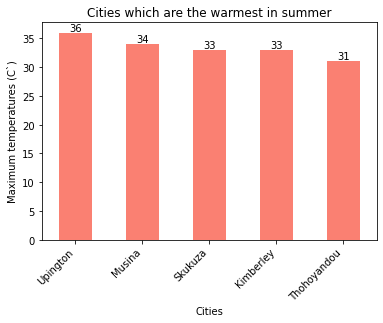

In [60]:
plt.figure(figsize = (15,10))
ax = df1.head(5).plot(kind = 'bar', color = 'salmon')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')
  ax.set_title('Cities which are the warmest in summer')
ax.set_xlabel('Cities')
ax.set_ylabel('Maximum temperatures (C`)')
ax.get_legend().remove()

In [58]:
df2 = df[['City', 'Winter(min)']].sort_values(by='Winter(min)')
df2.set_index('City', inplace=True)
df2

,Winter(min)
City,
Bloemfontein,0
Pietermaritzburg,3
Kimberley,3
Polokwane,4
Mthatha,4
Upington,4
Johannesburg,4
Pretoria,5
Nelspruit,6


<Figure size 1080x720 with 0 Axes>

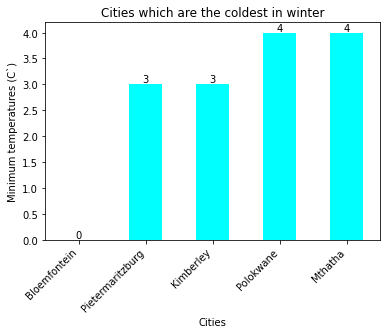

In [81]:
plt.figure(figsize = (15,10))
ax = df2.head(5).plot(kind = 'bar', color = 'cyan')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')
  ax.set_title('Cities which are the coldest in winter')
ax.set_xlabel('Cities')
ax.set_ylabel('Minimum temperatures (C`)')
ax.get_legend().remove()

# **Задание 2**

Недельная заработная плата десяти сотрудников (с инициалами A – J) составляет: 100, 120, 80, 155, 222, 400, 199, 403, 345, 290. Сохраните недельную заработную плату в DataFrame.

• Постройте гистограмму для отображения заработной платы в убывающем порядке.

• Обозначьте каждую полосу на гистограммах с помощью метода аннотации.

In [66]:
data = {'Name':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J' ], 'Weekly salary':[100, 120, 80, 155, 222, 400, 199, 403, 345, 290]}
df = pd.DataFrame(data)
df

,Name,Weekly salary
0,A,100
1,B,120
2,C,80
3,D,155
4,E,222
5,F,400
6,G,199
7,H,403
8,I,345
9,J,290


In [68]:
df1 = df[['Name', 'Weekly salary']].sort_values(ascending = False, by='Weekly salary')
df1.set_index('Name', inplace=True)
df1

,Weekly salary
Name,
H,403
F,400
I,345
J,290
E,222
G,199
D,155
B,120
A,100


<Figure size 1440x360 with 0 Axes>

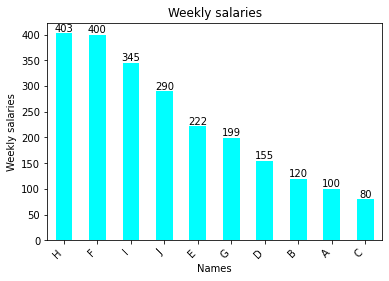

In [84]:
fig = plt.figure(figsize=(20,5))
ax = df1.plot(kind = 'bar', color = 'cyan')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2, p.get_height()), ha = 'center', va = 'bottom')
  ax.set_title('Weekly salaries')
ax.set_xlabel('Names')
ax.set_ylabel('Weekly salaries')
ax.get_legend().remove()